In [1]:
import sys
sys.path.append("..") # Adds higher directory to python modules path.
from pathlib import Path
import glob
import numpy as np
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import random
import pickle
import os
import config
import data
import random
from natsort import natsorted
import lfp
import importlib
arm = 'UR5'

print('Using local setup')
WORKING_PATH = Path().absolute().parent
print(f'Working path: {WORKING_PATH}')
os.chdir(WORKING_PATH)
STORAGE_PATH = WORKING_PATH
print(f'Storage path: {STORAGE_PATH}')
np.set_printoptions(suppress=True)

Using local setup
Working path: /catkin_ws/src/robotics/learning_from_play
Storage path: /catkin_ws/src/robotics/learning_from_play


In [2]:
synonyms = [
     ['push', 'depress', 'hit', 'press', 'prod', 'tap'],
    ['switch', 'button'],
    ['prism', 'rectangle', 'block'],
    ['grab', 'grasp', 'seize'],
    ['pick the block'],
    ['cupboard', 'cabinet'],
    ['place', 'put'],
    ['pull', 'drag']
]

def subout(label):
    string = label.numpy().decode()
    for replacements in synonyms:
        for word in replacements:
            if word in string:
                replacement = random.choice(replacements)
                string = string.replace(word, replacement)
    return string
    
    

def augment(t, serialise):
    t['tag'] = t['tags']
    t['label'] = subout(t['labels'])
    print(t['label'])
    t['label_embedding'] = embed([t['label']])
    return serialise(t)

In [20]:
import tensorflow_hub as hub
# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# model = hub.load(module_url)
# print ("module %s loaded" % module_url)
# def embed(input):
#   return model(input)


embed = hub.KerasLayer(str(STORAGE_PATH)+'/saved_models/universal_sentence_encoder')

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [32]:
DATA_PATH = [STORAGE_PATH/'data'/'diverse']

In [30]:
from lfp.data import read_traj_tfrecord, serialise_traj
from tqdm import tqdm
    
    
labelled_dl = lfp.data.labelled_dl(batch_size=2, include_images = True)
label_it = iter(labelled_dl.extract(DATA_PATH))


In [25]:
for i in range(0,4000):
    t = label_it.next()


tf.Tensor(b'grasp the blue block', shape=(), dtype=string)
tf.Tensor(b'seize the blue rectangle', shape=(), dtype=string)
tf.Tensor(b'press the blue button and prepare to grasp the red block', shape=(), dtype=string)
tf.Tensor(b'push the blue switch and prepare to grasp the red block', shape=(), dtype=string)
tf.Tensor(b'close the drawer', shape=(), dtype=string)
tf.Tensor(b'close the drawer', shape=(), dtype=string)
tf.Tensor(b'do nothing', shape=(), dtype=string)
tf.Tensor(b'do nothing', shape=(), dtype=string)
tf.Tensor(b'put the red block down and prepare to grasp the blue block', shape=(), dtype=string)
tf.Tensor(b'place the red prism down and prepare to grab the blue prism', shape=(), dtype=string)
tf.Tensor(b'lift the red prism up', shape=(), dtype=string)
tf.Tensor(b'lift the red block up', shape=(), dtype=string)
tf.Tensor(b'take the red block from the inside of the cupboard to the top', shape=(), dtype=string)
tf.Tensor(b'take the red block from the inside of the cupboard to 

tf.Tensor(b'move the cupboard door left', shape=(), dtype=string)
tf.Tensor(b'move the cupboard door left', shape=(), dtype=string)
tf.Tensor(b'pull the blue rectangle toward you', shape=(), dtype=string)
tf.Tensor(b'pull the blue block toward you', shape=(), dtype=string)
tf.Tensor(b'depress the red button', shape=(), dtype=string)
tf.Tensor(b'press the red button', shape=(), dtype=string)
tf.Tensor(b'put the blue block in the drawer', shape=(), dtype=string)
tf.Tensor(b'put the blue block in the drawer', shape=(), dtype=string)
tf.Tensor(b'move the red block right', shape=(), dtype=string)
tf.Tensor(b'move the red block right', shape=(), dtype=string)
tf.Tensor(b'lift up blue ', shape=(), dtype=string)
tf.Tensor(b'lift up blue ', shape=(), dtype=string)
tf.Tensor(b'lift blue rectangle', shape=(), dtype=string)
tf.Tensor(b'lift blue block', shape=(), dtype=string)
tf.Tensor(b'pull the drawer open', shape=(), dtype=string)
tf.Tensor(b'drag the drawer open', shape=(), dtype=string)
tf.T

tf.Tensor(b'press blue', shape=(), dtype=string)
tf.Tensor(b'push blue', shape=(), dtype=string)
tf.Tensor(b'use the blue rectangle to open the cupboard', shape=(), dtype=string)
tf.Tensor(b'use the blue block to open the cupboard', shape=(), dtype=string)
tf.Tensor(b'finish closing the drawer', shape=(), dtype=string)
tf.Tensor(b'finish closing the drawer', shape=(), dtype=string)
tf.Tensor(b'prod the blue rectangle forward', shape=(), dtype=string)
tf.Tensor(b'push the blue block forward', shape=(), dtype=string)
tf.Tensor(b'begin to place the red prism on top of the blue', shape=(), dtype=string)
tf.Tensor(b'begin to put the red block on top of the blue', shape=(), dtype=string)
tf.Tensor(b'pull the blue prism out of the cabinet', shape=(), dtype=string)
tf.Tensor(b'pull the blue block out of the cupboard', shape=(), dtype=string)
tf.Tensor(b'grasp the red block', shape=(), dtype=string)
tf.Tensor(b'grasp the red block', shape=(), dtype=string)
tf.Tensor(b'put red block next to blue

KeyboardInterrupt: 

In [31]:
t = label_it.next()
t['label_embeddings']

InvalidArgumentError: Feature: acts (data type: string) is required but could not be found.
	 [[{{node ParseSingleExample/ParseExample/ParseExampleV2}}]]

In [21]:

labelled_dl = lfp.data.labelled_dl(batch_size=1, include_images = True)
    
for path in DATA_PATH:
    label_it = iter(labelled_dl.extract([path]))

    save_path = str(path/'tf_records')+f"/labelled_augmented.tfrecords"
    with tf.io.TFRecordWriter(save_path) as file_writer:
        print(save_path)
        i = 0
        for t in tqdm(label_it):
            byte_stream = augment(t, serialise_traj)
            file_writer.write(byte_stream)
            

0it [00:00, ?it/s]

/catkin_ws/src/robotics/learning_from_play/data/diverse/tf_records/labelled_augmented.tfrecords
seize the blue rectangle


8it [00:00, 21.75it/s]

push the blue switch and prepare to grasp the red block
close the drawer
do nothing
place the red prism down and prepare to grab the blue prism
lift the red prism up
take the red block from the inside of the cupboard to the top
take the blue rectangle down into the cabinet
put the blue block on the green switch
begin closing the drawer
open the drawer and hit the green button
move the door right
drop the prism and open the right side of the cupboard
put the blue block on top of the shelf
stand up the blue rectangle


22it [00:00, 43.96it/s]

take the red rectangle out of the drawer
move the red block to the left
move the red rectangle right
chill
place the red rectangle in the sink
depress the green button
take the red block out of the drawer
cupboard door left and prepare to seize the blue block
grab the red rectangle
push the green button and go to the drawer
move the blue block into the cupboard
pull the red rectangle down
place the blue prism up
bring both blocks down stacked


36it [00:00, 55.57it/s]

drag the drawer open 
drop the blue rectangle into the drawer
seize the blue prism
put the blue block down
drag the red prism out of the cupboard
move the blue prism to the right of the blue button
pull the blue prism out of the sink
push the red switch
push the green switch
put the blue rectangle on the blue switch
close the drawer
keep the drawer open
close the left side of the cupboard
pull the red prism toward you


50it [00:01, 60.09it/s]

tap the red switch
put the blue block on top of the cabinet and hit the red switch
place the blue rectangle down upright
cabinet door left
place the red rectangle on the edge of the sink
pull the blue prism out of the drawer
move the red prism to the right
put the blue prism down upright
put the red prism down upright
pull the red prism out of the cupboard upright
go to the blocks
roll the red block into the sink
put the blue prism into the sink


64it [00:01, 60.62it/s]

press the red switch
goto blue prism
depress the green then red switch
roll the red block right
come to default
drop the red block into the drawer and close it
cupboard door to the middle
put the prism between the buttons and hit green
play with the drawer
put the red prism on the shelf
move the cupboard door left
pull the blue rectangle toward you
depress the red button


78it [00:01, 60.43it/s]

put the blue block in the drawer
move the red block right
lift up blue 
lift blue rectangle
drag the drawer open
drop the red rectangle into the sink
hit the green switch
stand the blue block up to your left
move the door left
move the door right
finish closing the door
move the door to the middle
depress the drawer closed


85it [00:01, 47.36it/s]

move the red rectangle into the cupboard
roll the blue rectangle right and go to the door
move the cupboard door left
grab the closest rectangle on the long side
depress the blue switch and move the door to the middle
close the left side of the cabinet
close the drawer
rotate the block on top right


97it [00:02, 37.25it/s]

move the block you are holding left
door left
slam the green switch
put the red block on the green button
cupboard door to the middle
cupboard door right
grasp the red block and rotate it right
take the red prism out of the drawer
move the prism to the shelf
depress the red button
tip over the red prism and pick it up


108it [00:02, 42.08it/s]

drop the blue rectangle upright between the red and blue buttons
drag the red prism out of the cabinet
grasp the red block
rotate the red rectangle left
use the red rectangle to open the door
adjust the red block's position
depress the door left
door left
place the rectangle down and go to the cupboard
press the green switch and lift up the red block
move the blue block left upright


120it [00:02, 46.57it/s]

pull the red rectangle out of the sink
drop the red rectangle into the drawer
close the drawer
pull both blocks out of the cabinet
place the red block down
lift the blue rectangle up to the shelf
place the red prism next to the blue one
close the right side of the cabinet
depress the blue button
finish closing the door and depress the green button
put the blue prism into the cabinet


131it [00:02, 49.20it/s]

seize the blue prism
pick up the red prism
hit the green switch and then go to the cabinet door
prepare to grasp the red block
push the green switch
put the red block on the blue switch
grab the drawer handle
push blue
use the blue rectangle to open the cupboard
finish closing the drawer
prod the blue rectangle forward


137it [00:03, 49.42it/s]

begin to place the red prism on top of the blue
pull the blue prism out of the cabinet
grasp the red block
place red rectangle next to blue rectangle
move the blue prism to the other side of the buttons


143it [00:03, 31.68it/s]

move the red prism left
stack the blue prism on top of the red prism
press the red button
make a T out of the red and blue block
door left


153it [00:03, 37.19it/s]

tip over the blue block
hit the green button
rotate the red block right
take the blue prism off the red prism
pres the red switch
depress the blue button
close the drawer
prod the red switch
hit the blue switch and move the red rectangle in
pick up the red prism


163it [00:03, 40.96it/s]

move the cabinet door left
toggle the cupboard door
depress the blue button and goto the blue rectangle
press the blue switch
put the red block on top of the blue
take the blue prism out of the drawer
close the drawer
drop the red rectangle into the drawer
drag red rectangle down


173it [00:03, 44.31it/s]

take the blue rectangle off the green switch
press the red switch
tip over the red prism
press the blue switch
open the drawer
place the blue prism next to the red
move the cupboard door left
pull the red prism out of the cupboard
place the red rectangle on the blue one
door left and depress the blue switch


178it [00:04, 45.04it/s]

rotate the red rectangle right
move the cupboard door right
hit the blue button
pull the red rectangle toward you
push the blue switch
door right
tip over the nearby block
door left and push blue
prod green and goto the drawer
grab the blue prism


189it [00:04, 47.46it/s]

grasp the door handle and pull it left
grasp the red rectangle
lift your hand up
put the blue block to the left
move the cupboard door to the middle
grasp the blue block
grab door handle and pull left
stand up the block
drop the red block into the drawer


194it [00:04, 37.10it/s]

put the red rectangle onto the blue button
move the cupboard door right
push the green switch
cupboard door left


199it [00:04, 27.60it/s]

open the drawer
depress the green button
push the green button and grasp the door handle
door left


208it [00:05, 31.53it/s]

door right
move the blue prism left
blue prism above the drawer
tap the red switch
grab the red block
move the blue rectangle right
grasp the red rectangle
put the blue rectangle on top of the cupboard
rotate the red prism right
blue block into cupboard


213it [00:05, 34.55it/s]

knock the tower over
knock the blue rectangle over
move the door right
place the blue prism forward
open the drawer
stand the blue block up 


222it [00:05, 34.65it/s]

cabinet door right
prod the red rectangle further in
push the red switch
move the blue block to the middle
drop the blue prism into the drawer and depress the blue switch
stack blue on red
prod the blue button
drag the blue rectangle up
move the cupboard door to the middle
drop the blue rectangle to the left


232it [00:05, 39.91it/s]

pull the blue rectangle down
grab the red rectangle
drag the red prism out
stand up the blue prism
pick up blue rectangle
push the red button
put the blue prism over the drawwr
open the drawer
knock over blue 


237it [00:05, 35.58it/s]

roll the red prism right
goto the blue block
stack the blue rectangle on the red one
throw the red rectangle into the drawer


246it [00:06, 31.76it/s]

goto the drawer
door left and goto the red rectangle
press the blue switch and goto the red block
prod the blue switch
stack red block on blue block
drop the blue prism in the drawer and push the blue switch
put the red prism on the red button and grasp the blue prism
place the blue block to the left


256it [00:06, 37.57it/s]

close the drawer halfway
d
roll the blue prism right and pick it up
push the green switch and goto the sink
grab the blue block
close the drawer halfway
grasp the blue prism
hit the green switch
pull the blue prism down


266it [00:06, 42.23it/s]

stand the blue prism up
do nothing
move the blue block left
grab the red rectangle
shift the door
drag the red rectangle down
put the blue prism to the left of the buttons
close the door to the right
roll the blue prism right
grasp the blue prism


271it [00:06, 44.14it/s]

lift the blue block up
put the blue block down
hit the blue switch
drag the blue rectangle out
close the drawer
hit the blue switch
depress the blue button and grasp the door
pull the red prism out of the drawer
put the blue rectangle to the right
grasp the blue block from the sink


286it [00:07, 46.88it/s]

goto the drawer
hit the blue button
hit the blue button
grab both prisms
stand up the blue prism
drop the prism in the drawer
seize the red prism
put the red prism next to the blue one and push green switch
place the red rectangle down
put the blue block to the left


291it [00:07, 38.58it/s]

cupboard door right
shift the red prism forward
pull the blue block toward you
depress the green switch and grasp the blue block
push the red button
move the door to the right
 place the red prism in the cupboard
move the door to the left and go above the green switch
place the red rectangle on top of the blue rectangle


296it [00:07, 28.44it/s]

place the blue block on the red button
go to the blue prism
place the blue prism in the cupboard
hit the green switch


305it [00:07, 28.52it/s]

press the green button
depress the blue button
place the prism down
place the red rectangle forward
press the red button
depress the blue switch
pull the red prism down
put the red block between the buttons
roll the red rectangle into the sink


316it [00:08, 36.52it/s]

place the red block on the shelf
push the red button
hit the green button
come back to resting
close the drawer
do nothing
depress the green switch
push the red button and grab the right most block
grasp the blue prism
press the red button
move the cabinet door left


327it [00:08, 42.24it/s]

pull the blue prism out
stab the drawer open
knock the block over
drag the red prism out
drop the red prism in the drawer
pull the drawer open
prepare to grasp the red prism
depress the blue switch
grab the blue block
depress the blue button


332it [00:08, 42.98it/s]

press the door left
close the door left fast and goto red
pull the blue prism down
drag the drawer open
hit the blue rectangle in
pull the drawer open and go to the blue block
move the door left and go to the red rectangle


337it [00:08, 35.00it/s]

toggle the door 
slam the red button
put the blue prism on the other side of the buttons
put the blue prism down


345it [00:08, 30.69it/s]

push the red button
knock the blue door over
stand the nearest rectangle up
open the drawer
get the blue block
pull the red prism from the sink
stand up the red block
place the blue rectangle on the shelf
put the red prism forward


355it [00:09, 37.45it/s]

put the red rectangle left
place the blue prism in the cupboard
go to the red block
grab the red rectangle
stand the blue prism up on the edge of the sink
rotate the blue block left
pick up the blue block
put down the blue block
use the red rectangle to depress the door
put the red block on the shelf


365it [00:09, 42.53it/s]

do nothing
pull the red block out
grab red from sink
grasp the red block
toggle the door
depress the blue button and lift the hand up
lift both rectangles
move the door to the middle
grab the door
press the blue button


376it [00:09, 45.96it/s]

throw the blue prism on the switchs
line up with the drawer handle
move the door right
pick up the red block
place the blue rectangle in the sink
pick up the blue block
move the cupboard door right
roll the red prism right
pull the red rectangle out
put the blue rectangle on the shelf
place the red prism in the cupboard


386it [00:09, 43.93it/s]

move the cabinet door to the middle
put the red block on the blue
roll the blue rectangle back
prod the green button
place the blue rectangle down
drop it in the sink
stand and lift up the red prism


391it [00:10, 30.59it/s]

open the drawer for the blocks
push the red switch
lift both prisms to the shelf
grab the red block


395it [00:10, 25.18it/s]

place the red prism to the left
move the rectangle left
push the blue switch
place the blue rectangle on the shelf


399it [00:10, 25.00it/s]

close the right side of the cabinet
pull the red rectangle off
grab blue 
depress the tower
hit the blue switch
line up with the door
pick up the red block length ways
stand up the red rectangle


409it [00:10, 33.76it/s]

hit the green button
push the blue button
close the drawer and goto the door
do nothing
move the blue block right
pick up the blue prism
move the door to the middle
go over the drawer
move the blue rectangle to the right
grasp the drawer handle
place the blue rectangle on the red switch


425it [00:11, 44.75it/s]

push the green switch
rotate the red rectangle left
grasp blue
do nothing
go to the blue block
stand up the blue block
pull both rectangles out and up
close the drawer
place the red prism on the shelf
move the red rectangle left
pull the blue rectangle down


431it [00:11, 47.58it/s]

drag the blue prism out
move the blue rectangle up on to the shelf
stand up and tip over the prism 
grab the red block
move the cupboard door left
move the cupboard door left
grasp the blue block
go to the blocks
hit the green button
move the red prism left


436it [00:11, 41.87it/s]

door right
hit the green button and then go to the right
grab the red rectangle
drop the red block on the button below


441it [00:11, 28.19it/s]

roll the red rectangle right
move the blue prism left
pick up the blue block
pick up the block in the drawer
seize the prism in the drawer
pull the drawer open


451it [00:11, 34.44it/s]

depress the green button
move the red prism on the shelf
put the blue rectangle in the cupboard
do nothing
chill out
place the red block over the drawer
place the red block in the cupboard
grab the blue rectangle
hit the red button
roll the red prism right
go to the drawer handle


463it [00:12, 42.81it/s]

put the red rectangle to the right
put the blue rectangle on the red rectangle
drop both rectangles in the sink
pull the blue rectangle out
depress the green switch
lift the blue button up
press the red switch
move the blue door left
tip over the red block
finish closing the door
depress the red switch


475it [00:12, 47.46it/s]

go over the drawer
grab the nearest prism
lift the red prism onto the shelf
close the door right
press the green button
lift the red rectangle
grasp the red rectangle lengthways
pull the drawer handle a little
close the drawer
lift the red rectangle onto the shelf
open the right side of the cabinet


487it [00:12, 50.02it/s]

open the left side of the cabinet
drop the red rectangle next to the sink
close the door to the left
pull the blue block out
pick up the red block
grab the blue prism 
drop the block
depress the blue switch
prepare to stack the blocks
close the door to the right
drop the red prism
press the red switch
hit the blue button
hit the blue switch


493it [00:12, 33.64it/s]

drop the red prism in the drawer
go to the prism in the sink
close the drawer
drag the red rectangle toward you


502it [00:13, 28.12it/s]

finish closing the door
grab the red rectangle
drop the red rectangle
grab the blue prism
drop the blue block in the drawer
depush the door right
move your block right


512it [00:13, 35.24it/s]

place down the rectangle
take the blue prism out of the drawer
tap the green button
move the blue rectangle along the top of the cabinet
roll the blue rectangle right
place the blue block closer to you
place the red block down upright
depress the blue switch
cupboard door left then go to the prisms
push the blue button


522it [00:13, 40.41it/s]

pull the drawer open 
put the blue rectangle on the red rectangle
chill out
close your gripper then pick up the red prism
take the blue prism down from the top
grab blue
pick up both blocks
grab the blue block and lift it up
do nothing
pick up the red rectangle


532it [00:13, 44.36it/s]

move both blocks closer to you
place the red rectangle on top of the cabinet
stand the blue prism up to the left
stand the blue rectangle up
grab the red prism
pull the cabinet door to the right
roll the blue rectangle right and grasp it
rotate both prisms left
close the drawer
place the red block in the center of the table


537it [00:14, 32.95it/s]

go to the drawer
do nothing
close the cabinet's left side
take the blue prism to the center of the table


541it [00:14, 29.40it/s]

pick up the blue block
pick up the red prism
pick up the red block
push the red button and move the door to the middle
grab the higher rectangle
place the rectangle standing up in the drawer
press the blue switch


551it [00:14, 36.31it/s]

rotate the red block right
open the drawer
hit the blue switch
move the cupboard door right
cupboard door left
knock over the red prism
cupboard door left please
prepare to grasp the red block
drop the blue rectangle in the drawer
drop the blue rectangle in the sink


562it [00:14, 43.85it/s]

stack the red prism on top of the blue prism
move blue block above the red button
spin the blue prism
dedepress the blue button
press the red button
go to the blue prism
move the cabinet right
grab the red rectangle
open the drawer
move the cupboard door a little right
drop the blue prism in the sink and pick up the red prism
roll the red prism right


574it [00:14, 50.52it/s]

move the blue block forward
press the blue switch
knock over the red prism
move the blue rectangle above the drawer
use the rectangle to open the cupboard
drag the prism out of the drawer
hover over the switchs
pull the red block off the cabinet
move the door left
put both prisms in the cabinet
put the red rectangle above the blue rectangle
go to red prism


586it [00:15, 50.70it/s]

place red prism in cabinet
stand up red block
depress the left side of the red block
go over the red prism
roll the blue block into the sink
move the cabinet door left
grasp the blue prism
grab the red prism
place the red rectangle on the cupboard
rotate the blue prism left


592it [00:15, 41.60it/s]

envelop the red rectangle
stand up the red block
do nothing
touch both handles
drag red prism up


597it [00:15, 30.57it/s]

roll the blue prism right
move the cupboard door right
put the blue prism on the cupboard
move the blue block left


601it [00:15, 26.00it/s]

press the green button
knock over the blue block and push the cabinet right
move the blue block left
hit the drawer open


605it [00:16, 26.81it/s]

go to the blue prism
move the door right
put the red rectangle in the cupboard
push door left
don't do much
put the blue prism down and pick up the red prism
go to the door handle
hit the blue switch
place the blue block to the left
hit the green button


616it [00:16, 35.58it/s]

put down the blue block and go to the switchs on the right
hit the blue switch then the green switch
depress the red switch
drop the rectangle
swap blocks
drop the blue rectangle in the sink and prod the green button
move the door to the right
pick up the red prism
move the door left and grab the prism from the sink
swap blocks


626it [00:16, 39.74it/s]

pull the door to the right
move the blue rectangle to the right side of the table
move the door to the right
take the red block off the blue block
open the drawer
door right and go to the blocks
tap the blue switch
pull the red prism down
swap blocks
move the red block to the left side of the table


636it [00:16, 41.49it/s]

press the green switch
expose the red prism inside the cupboard
move the door right and go for blue
move the door left
bring the red block over the drawer
pick up the blue block 


641it [00:16, 29.97it/s]

bring the red rectangle next to the blue rectangle 
bring the red prism to the right
roll the red prism right twice 
move the red rectangle slightly forward
place the red prism down upright
close the drawer


651it [00:17, 36.63it/s]

close the drawer
press the red switch
drop the block
do nothing
go up slightly
place the red block closer to the red block
drop the red and pick up the blue rectangle
drop the block and go to the red block
place the blue prism at the cupboard door
go to the drawer handle


663it [00:17, 43.46it/s]

rotate the red prism left
move the door left
seize the red rectangle
pull open the drawer and grasp the red prism
open the drawer and go to the red prism
depress the blue switch and go to the door
close the drawer
stand the blue block up on the other side of the switchs
drag the red block out of the cabinet
roll the red rectangle right
open the right side of the door


668it [00:17, 42.22it/s]

place the red prism on the table and go back for blue
open the drawer
move the door right
drop blue go to red
open the drawer
rotate the prism right
stand up the red rectangle
place the blue rectangle on top of the red rectangle upright
hit the door to the left


683it [00:17, 45.58it/s]

hit the blue switch
place the blue prism down upright
drag the blue block toward you
use the prism to close the door to the left
drop the blue prism on the blue button and grab the door handle
push the green button and depush the door left
put the red block into the cupboard
drop the red prism on the blue prism
push the cupboard door right
place the blue block onto the shelf


688it [00:17, 46.50it/s]

close the drawer
pull the red prism out of the cabinet
hit the blue switch
close the drawer
put the red rectangle into the cupboard
hit the green button
stand up the red rectangle
rotate the red rectangle left


693it [00:18, 34.96it/s]

go to the door handle
hit the red switch
put the blue block on top of the cabinet
move the blue rectangle towards the cupboard


697it [00:18, 28.23it/s]

hit the red button
push the green switch and then go to the red
relax
open the drawer a little


704it [00:18, 24.83it/s]

push the door open
drag the blue block off the blue button
push the green button and then go to the drawer
close the drawer to the right
depress the blue switch and go to the rectangles
move the door to the right and go to the red switch


714it [00:18, 33.47it/s]

close the drawer
lift the blue block up
knock over the red switch
rotate both prisms right
drop the blue block to the right
move the closest prism forward
place the block on the top the cabinet
grab the red block
push the green switch
move the blue prism to the left


724it [00:19, 39.82it/s]

get the red prism from inside the cupboard
move the red rectangle left
roll the blue rectangle forward
place the red prism on top of the cupnboard
close the drawer a little
hit the blue button then go to the door handle
grasp the block inside the drawer
place the blue block in the cupboard
grab the blue rectangle
move the door left


729it [00:19, 41.20it/s]

put the red rectangle on the red button
press the drawer closed
put the blue prism on the shelf
depress the red button
grab the drawer handle
pick up the blue prism
hit the cupboard door right
pick up both rectangles


734it [00:19, 37.39it/s]

move the blue rectangle right
move the blue block over the drawer
seize the red block from the back of the sink
close the drawer


743it [00:19, 33.45it/s]

put the blue prism on top of the cabinet
pull the blue rectangle out of the sink
press the blue switch
drop the blue block next to the blue switch
drag the blue rectangle off the shelf
pick up the blue block lengthways
move the red block to the right 
pull both prisms out of the cupboard
drop the red prism on top of the blue prism


753it [00:20, 38.19it/s]

grab the drawer handle
drop the red block to your right
depress the drawer open
drop the red rectangle on top of the blue switch
roll the blue block left
grasp the door handle
place the blue prism at the mouth of the cabinet
move the cupboard door right
return the resting


763it [00:20, 41.46it/s]

push the red button 
pull the red rectangle down
move the red block forward
push the red button
finish closing the door to the right
go to the red prism
press the green switch
move the blue block slightly forward
open the drawer and grab both blocks
move the stacked prisms left


773it [00:20, 43.53it/s]

put the blue rectangle on top of the shelf
get at both blocks in the cupboard
close the drawer
go to the highest of the stacked prisms
roll the blue block into the drawer
hit the blue button
hit the red button
open the drawer to get the blue prism
drop the rectangle and prod the blue button


783it [00:20, 45.61it/s]

stand up the blue prism
place the blue prism over the sink
depress the green button and seize the blue block
roll the blue rectangle towards the sink
drop the red rectangle into the drawer
move the red block closer to the sink
grab the block inside the drawer
push the red switch
pick up the red rectangle
grab the red prism


788it [00:20, 38.26it/s]

lay the blue rectangle down on the shelf
drop the block and seize the door
pull the blue prism out of the cabinet
knock over the red switch 
close the drawer


793it [00:21, 27.82it/s]

close the drawer
throw the blue block down onto the table
press the red button and open the door to the left
move the red block left


797it [00:21, 23.95it/s]

close the drawer
press the green switch
push the red button
lift up the red button


800it [00:21, 20.96it/s]

lay the red block down on the table
grab the blue block
put the blue block to the left


803it [00:21, 20.11it/s]

move the cupboard door left
pull the red prism out of the drawer
lift up the red prism
regrasp the red prism


811it [00:21, 25.77it/s]

cupboard door left
finish closing the cupboard door
depress the red switch
seize the blue prism
go to the door handle
cabinet door right
place the blue block ahead of you
push the blue button then the green button
place the blue rectangle on the shelf and prod the blue button
put the red prism on the shelf and roll it right


820it [00:22, 32.61it/s]

open the drawer
move the cupboard door right
grab the red prism
roll the red block into the drawer
pick up the blue prism
put the blue prism in the cupboard
place the red rectangle on top of the cupboard
push the red rectangle into the drawer
hit the blue switch


830it [00:22, 37.72it/s]

grab the door handle
lift the red rectangle onto the shelf
lift up the red block
stack the red block on top of the blue block and depress the green switch
place the blue prism between the red prism and the sink
press the blue rectangle 
move the red block towards the cupboard
push the switch
take the red button down from the shelf


840it [00:22, 42.66it/s]

pull the door left
knock the red prism into the sink
hit the blue switch
move the door mostly right
stack the red block on the blue block upright
unstack the blocks
roll the red rectangle to the right
pick up the red block
push the green switch
move the blue block left


850it [00:22, 44.32it/s]

rotate the red rectangle right
pick up the blue rectangle
move the blue rectangle to the right
go to the door handle
lift the red prism onto the shelf
roll the blue prism left
move the blue rectangle to the mouth of the cupboard
stand up the red rectangle
lift the blue rectangle onto the shelf
push the blue button


860it [00:23, 45.24it/s]

move the blue block to the left of the switchs and grab the door handle
tap the red button and go to the door handle
knock over the blue switch
move the door left
depress the green switch with an open hand
move the blue prism towards the cupboard
grasp the red rectangle
push the red button and go back to the door
move the blue block to the left
pull the red rectangle out of the cabinet


870it [00:23, 45.37it/s]

stand the red prism upright
prod the door to the left
move the door right
grab the red prism
press the red button
close the drawer
lift up the red prism
roll the red block off the shelf
push the red switch
adjust the red rectangle left


875it [00:23, 46.08it/s]

lift the blue block
move the door right
drag the red block out of the cupboard
push the red button
slam the blue button
stand up the blue prism
place the blue block on the green switch


880it [00:23, 39.13it/s]

pull the red prism off the shelf
grab the red rectangle lengthways
put the blue block on top of the red block
place the blue block on the green button and move the door to the middle


885it [00:23, 29.33it/s]

put the blue prism to the right of the switchs
stand up the red rectangle
adjust the red block slightly forward
adjust the blue block slightly forward


889it [00:24, 25.33it/s]

open the drawer
lift the blue prism up
lift the blue prism above the drawer
lift the blue block up


895it [00:24, 23.13it/s]

press the door right, but not all the way
violently drag the red rectangle out
stand up the red prism
orient the red rectangle down
press the green button
move the red rectangle over the blue button
close the drawer


905it [00:24, 32.80it/s]

put the red prism in the center of the table
grasp the red rectangle
roll the red block right
press the door left
stand up the red rectangle
roll the red prism right
pull the red prism down from the shelf
knock the blue rectangle over with the red rectangle
drag the red rectangle out of the drawer
adjust the blue rectangle left


915it [00:24, 39.48it/s]

knock the red prism over
shift both prisms left
lift the red rectangle slightly up
move the door right
roll the red rectangle toward you
open the drawer
do nothing
move the door to the center
move the blue rectangle right


925it [00:25, 40.99it/s]

move the red rectangle into the cupboard
move the blue prism to the right
lift the blue rectangle over the center of the table
pull the red rectangle out of the cupboard
put the blue block above the green switch
close the drawer
go to the red prism
put the red prism on top of the cupboard
catch the red block
knock the red block towards the sink


935it [00:25, 43.16it/s]

press the green button
pull the red prism down from the top
move the door slightly left
grasp the blue rectangle
place the red block on top of the blue block
take the blue block off the top of the red block
open the drawer
move the cupboard door left
move the door left
pull the red block out of the cupboard


945it [00:25, 46.24it/s]

pull the red rectangle towards you
depress the red button
move the red rectangle into the center of the table
stay at resting
rest at default
take the blue prism out of the drawer
rotate the red rectangle left
close the drawer
push the door left
move the red prism right


956it [00:25, 49.02it/s]

carefully place down the red rectangle, and depress the blue switch
place the red block in the center of the table
place the blue rectangle to your left
close the door to the right
depress the green switch
hit the red switch
move the blue rectangle right
go to the door handle
move the red prism right
close the door to the right
grasp the door handle


966it [00:25, 47.94it/s]

open the left side of the cupboard
grab the red block lengthways
push the red switch
lift your hand slightly
press the green switch slowly
roll the red block right
rotate the red rectangle's orientation
open the drawer
open the drawer
open the drawer


976it [00:26, 46.28it/s]

lay the prism down
lay the block down and grasp the drawer handle
stand up the blue block
move the drawer in and out
lift the blue block out of the drawer
pick up the blue prism
prod the red switch
open the drawer halfway
pull the blue rectangle out of the cupboard
put the blue block down to your right


981it [00:26, 41.67it/s]

move the cupboard door to the middle
move the blue block into the cabinet
move the door to the right
move the blue rectangle up 


986it [00:26, 28.32it/s]

stand up the red prism
move the blue prism into the cupboard
pick up the red prism
grasp the red rectangle


990it [00:26, 23.81it/s]

press the blue switch
pull the red rectangle out of the cupboard
take the blue rectangle off the green button
move the cupboard door right


993it [00:26, 21.90it/s]

cupboard door left and flip the blue prism off the button
press the blue button
place the blue prism over the red button
open the drawer


1000it [00:27, 36.71it/s]

prod the blue button
move the door left using the prism
drop the prism into the drawer
close the drawer
pick up both rectangles
push the red switch


In [13]:
str(path)

'/catkin_ws/src/robotics/learning_from_play/data/diverse'

In [33]:
from lfp.data import read_vid, serialise_vid
DATA_PATH = [STORAGE_PATH/'data'/'contrastive_vids']
contrastive_dl = lfp.data.labelled_dl(batch_size=1, read_func = read_vid)
contrastive_it = iter(contrastive_dl.extract(DATA_PATH))

In [86]:
from tqdm import tqdm
save_path = str(DATA_PATH[0]/'tf_records')+f"/labelled_augmented.tfrecords"
with tf.io.TFRecordWriter(save_path) as file_writer:
    print(save_path)
    i = 0
    for i in tqdm(range(0,1000)):
        t = contrastive_it.next()
        byte_stream = augment(t, serialise_vid)
        file_writer.write(byte_stream)

  0%|          | 3/1000 [00:00<00:39, 25.38it/s]

/catkin_ws/src/robotics/learning_from_play/data/contrastive_vids/tf_records/labelled_augmented.tfrecords
push the purple switch and prepare to grasp the yellow prism
seize the purple block
do nothing
close the drawer
put the yellow prism down and prepare to grab the purple prism
take the purple block down into the cupboard


  1%|▏         | 13/1000 [00:00<00:24, 40.91it/s]

lift the yellow prism up
take the yellow prism from the inside of the cupboard to the top
place the purple rectangle on the black switch
begin closing the drawer
open the drawer and prod the black button
move the door right
drop the rectangle and open the right side of the cabinet
place the purple block on top of the shelf
stand up the purple prism
take the yellow prism out of the drawer
move the yellow prism to the left


  2%|▏         | 24/1000 [00:00<00:20, 46.56it/s]

move the yellow prism right
chill
put the yellow rectangle in the sink
depress the black button
take the yellow prism out of the drawer
cupboard door left and prepare to grasp the purple rectangle
grab the yellow block
depress the black switch and go to the drawer
move the purple rectangle into the cupboard
pull the yellow block down
place the purple block up


  4%|▎         | 36/1000 [00:00<00:19, 49.70it/s]

bring both prisms down stacked
pull the drawer open 
drop the purple block into the drawer
grab the purple rectangle
put the purple rectangle down
pull the yellow rectangle out of the cupboard
move the purple prism to the right of the purple button
pull the purple prism out of the sink
press the yellow button
depress the black button
place the purple rectangle on the purple switch


  5%|▍         | 47/1000 [00:01<00:19, 49.76it/s]

close the drawer
keep the drawer open
close the left side of the cupboard
drag the yellow rectangle toward you
press the yellow button
place the purple block on top of the cupboard and push the yellow button
put the purple rectangle down upright
cupboard door left
place the yellow rectangle on the edge of the sink
pull the purple rectangle out of the drawer


  6%|▌         | 58/1000 [00:01<00:19, 48.96it/s]

move the yellow block to the right
place the purple prism down upright
put the yellow prism down upright
pull the yellow rectangle out of the cupboard upright
go to the prisms
roll the yellow prism into the sink
place the purple rectangle into the sink
hit the yellow button
goto purple rectangle
tap the black then yellow button


  6%|▋         | 64/1000 [00:01<00:18, 49.75it/s]

roll the yellow block right
come to default
drop the yellow rectangle into the drawer and close it
cabinet door to the middle
place the prism between the switchs and press black
play with the drawer
place the yellow block on the shelf
move the cupboard door left
pull the purple rectangle toward you
push the yellow switch


  7%|▋         | 74/1000 [00:01<00:20, 44.13it/s]

place the purple prism in the drawer
move the yellow block right
lift up purple 
lift purple block
drag the drawer open
drop the yellow prism into the sink
prod the black switch
stand the purple rectangle up to your left


  8%|▊         | 84/1000 [00:01<00:21, 42.77it/s]

move the door left
move the door right
finish closing the door
move the door to the middle
push the drawer closed
move the yellow rectangle into the cupboard
roll the purple prism right and go to the door
move the cabinet door left
grab the closest rectangle on the long side


  9%|▉         | 94/1000 [00:02<00:20, 43.89it/s]

push the purple switch and move the door to the middle
close the left side of the cabinet
close the drawer
rotate the rectangle on top right
move the rectangle you are holding left
door left
slam the black switch
place the yellow prism on the black switch
cupboard door to the middle
cupboard door right


 11%|█         | 106/1000 [00:02<00:18, 47.57it/s]

grab the yellow block and rotate it right
take the yellow block out of the drawer
move the rectangle to the shelf
hit the yellow switch
tip over the yellow rectangle and pick it up
drop the purple rectangle upright between the yellow and purple switchs
pull the yellow rectangle out of the cupboard
grab the yellow prism
rotate the yellow block left
use the yellow block to open the door
adjust the yellow prism's position


 12%|█▏        | 118/1000 [00:02<00:17, 50.26it/s]

hit the door left
door left
put the block down and go to the cabinet
depress the black switch and lift up the yellow prism
move the purple block left upright
pull the yellow prism out of the sink
drop the yellow prism into the drawer
close the drawer
drag both prisms out of the cupboard
place the yellow prism down
lift the purple block up to the shelf


 12%|█▏        | 124/1000 [00:02<00:17, 50.36it/s]

place the yellow block next to the purple one
close the right side of the cabinet
press the purple button
finish closing the door and push the black switch
put the purple prism into the cupboard
grasp the purple rectangle
pick up the yellow rectangle
push the black switch and then go to the cabinet door
prepare to grab the yellow prism
prod the black button
put the yellow block on the purple switch


 14%|█▎        | 136/1000 [00:02<00:16, 53.49it/s]

seize the drawer handle
prod purple
use the purple rectangle to open the cupboard
finish closing the drawer
depress the purple block forward
begin to put the yellow block on top of the purple
drag the purple block out of the cupboard
seize the yellow rectangle
place yellow rectangle next to purple rectangle
move the purple prism to the other side of the switchs
move the yellow prism left


 14%|█▍        | 142/1000 [00:03<00:18, 45.80it/s]

stack the purple rectangle on top of the yellow rectangle
depress the yellow switch
make a T out of the yellow and purple rectangle
door left
tip over the purple rectangle


 15%|█▌        | 152/1000 [00:03<00:23, 36.39it/s]

push the black switch
rotate the yellow block right
take the purple block off the yellow block
pres the yellow button
depress the purple button
close the drawer
hit the yellow switch
push the purple switch and move the yellow rectangle in


 16%|█▋        | 163/1000 [00:03<00:19, 42.10it/s]

pick up the yellow prism
move the cupboard door left
toggle the cabinet door
press the purple button and goto the purple block
depress the purple button
put the yellow prism on top of the purple
take the purple block out of the drawer
close the drawer
drop the yellow block into the drawer
drag yellow prism down
take the purple block off the black switch


 17%|█▋        | 173/1000 [00:03<00:18, 44.81it/s]

press the yellow switch
tip over the yellow rectangle
depress the purple switch
open the drawer
place the purple block next to the yellow
move the cabinet door left
pull the yellow prism out of the cupboard
put the yellow prism on the purple one
door left and press the purple switch
rotate the yellow rectangle right


 18%|█▊        | 183/1000 [00:04<00:17, 45.47it/s]

move the cupboard door right
push the purple switch
pull the yellow block toward you
depress the purple button
door right
tip over the nearby prism
door left and hit purple
depress black and goto the drawer
grasp the purple rectangle
grab the door handle and pull it left


 19%|█▉        | 188/1000 [00:04<00:19, 42.37it/s]

grab the yellow rectangle
lift your hand up
put the purple rectangle to the left
move the cupboard door to the middle
grab the purple block
grasp door handle and pull left
stand up the prism
drop the yellow prism into the drawer
place the yellow rectangle onto the purple switch


 20%|█▉        | 198/1000 [00:04<00:18, 43.17it/s]

move the cupboard door right
press the black switch
cabinet door left
open the drawer
tap the black button
hit the black button and grab the door handle
door left
door right
move the purple block left


 21%|██        | 208/1000 [00:04<00:20, 39.12it/s]

purple prism above the drawer
press the yellow switch
grasp the yellow block
move the purple rectangle right
grab the yellow block
put the purple rectangle on top of the cupboard
rotate the yellow rectangle right
purple block into cupboard


 22%|██▏       | 216/1000 [00:04<00:21, 36.95it/s]

knock the tower over
knock the purple prism over
move the door right
place the purple block forward
open the drawer
stand the purple prism up 
cabinet door right
tap the yellow block further in


 22%|██▎       | 225/1000 [00:05<00:19, 38.95it/s]

press the yellow switch
move the purple block to the middle
drop the purple rectangle into the drawer and push the purple switch
stack purple on yellow
push the purple button
drag the purple rectangle up
move the cupboard door to the middle
drop the purple rectangle to the left
pull the purple prism down


 24%|██▎       | 236/1000 [00:05<00:17, 44.38it/s]

grasp the yellow block
drag the yellow block out
stand up the purple rectangle
pick up purple block
hit the yellow button
put the purple block over the drawwr
open the drawer
knock over purple 
roll the yellow rectangle right
goto the purple prism
stack the purple prism on the yellow one


 25%|██▍       | 249/1000 [00:05<00:14, 51.57it/s]

throw the yellow block into the drawer
goto the drawer
door left and goto the yellow rectangle
press the purple switch and goto the yellow block
push the purple button
stack yellow prism on purple prism
drop the purple block in the drawer and hit the purple switch
put the yellow block on the yellow switch and grasp the purple block
put the purple rectangle to the left
close the drawer halfway
d
roll the purple prism right and pick it up


 26%|██▌       | 255/1000 [00:05<00:18, 41.14it/s]

hit the black switch and goto the sink
grasp the purple block
close the drawer halfway
grab the purple prism
tap the black switch


 26%|██▌       | 260/1000 [00:06<00:21, 33.76it/s]

pull the purple rectangle down
stand the purple rectangle up
do nothing
move the purple rectangle left
grasp the yellow block


 26%|██▋       | 264/1000 [00:06<00:24, 30.46it/s]

shift the door
pull the yellow block down
put the purple block to the left of the switchs
close the door to the right
roll the purple prism right
seize the purple block


 27%|██▋       | 273/1000 [00:06<00:20, 35.48it/s]

lift the purple prism up
place the purple rectangle down
push the purple button
pull the purple rectangle out
close the drawer
hit the purple switch
press the purple switch and grasp the door
pull the yellow prism out of the drawer
place the purple rectangle to the right
grasp the purple rectangle from the sink


 28%|██▊       | 283/1000 [00:06<00:17, 39.84it/s]

goto the drawer
tap the purple switch
hit the purple switch
grab both prisms
stand up the purple prism
drop the block in the drawer
grab the yellow block
place the yellow rectangle next to the purple one and press black button
put the yellow rectangle down
put the purple prism to the left


 29%|██▉       | 293/1000 [00:06<00:16, 43.44it/s]

cabinet door right
shift the yellow prism forward
pull the purple rectangle toward you
hit the black button and grasp the purple rectangle
push the yellow switch
move the door to the right
 put the yellow block in the cupboard
move the door to the left and go above the black switch
place the yellow prism on top of the purple prism
put the purple block on the yellow button


 30%|███       | 304/1000 [00:07<00:14, 46.79it/s]

go to the purple rectangle
place the purple rectangle in the cupboard
press the black button
depress the black switch
prod the purple switch
place the block down
put the yellow prism forward
depress the yellow button
push the purple switch
pull the yellow block down
put the yellow rectangle between the buttons


 32%|███▏      | 315/1000 [00:07<00:14, 47.27it/s]

roll the yellow rectangle into the sink
place the yellow prism on the shelf
press the yellow switch
push the black switch
come back to resting
close the drawer
do nothing
hit the black switch
press the yellow button and grasp the right most rectangle
seize the purple block


 32%|███▎      | 325/1000 [00:07<00:15, 43.78it/s]

press the yellow switch
move the cupboard door left
pull the purple prism out
stab the drawer open
knock the prism over
pull the yellow rectangle out
drop the yellow prism in the drawer
drag the drawer open
prepare to grab the yellow rectangle


 33%|███▎      | 330/1000 [00:07<00:16, 40.48it/s]

push the purple button
grasp the purple block
push the purple button
tap the door left
close the door left fast and goto yellow
drag the purple block down
pull the drawer open


 34%|███▍      | 340/1000 [00:07<00:16, 39.36it/s]

hit the purple prism in
pull the drawer open and go to the purple block
move the door left and go to the yellow block
toggle the door 
slam the yellow button
place the purple rectangle on the other side of the switchs
put the purple rectangle down
press the yellow button
knock the purple door over


 35%|███▌      | 350/1000 [00:08<00:15, 43.15it/s]

stand the nearest prism up
open the drawer
get the purple rectangle
pull the yellow prism from the sink
stand up the yellow rectangle
put the purple rectangle on the shelf
put the yellow block forward
place the yellow rectangle left
place the purple block in the cupboard
go to the yellow rectangle


 36%|███▌      | 362/1000 [00:08<00:12, 49.79it/s]

grab the yellow prism
stand the purple rectangle up on the edge of the sink
rotate the purple block left
pick up the purple block
place down the purple rectangle
use the yellow prism to push the door
place the yellow block on the shelf
do nothing
pull the yellow prism out
grab yellow from sink
grasp the yellow rectangle
toggle the door


 37%|███▋      | 368/1000 [00:08<00:12, 51.73it/s]

depress the purple switch and lift the hand up
lift both prisms
move the door to the middle
seize the door
push the purple button
throw the purple block on the switchs


 37%|███▋      | 374/1000 [00:08<00:18, 33.80it/s]

line up with the drawer handle
move the door right
pick up the yellow prism
place the purple rectangle in the sink
pick up the purple rectangle


 38%|███▊      | 385/1000 [00:09<00:16, 38.36it/s]

move the cabinet door right
roll the yellow prism right
pull the yellow block out
place the purple block on the shelf
put the yellow block in the cabinet
move the cabinet door to the middle
place the yellow prism on the purple
roll the purple block back
hit the black button
put the purple prism down
drop it in the sink


 40%|███▉      | 396/1000 [00:09<00:13, 43.80it/s]

stand and lift up the yellow rectangle
open the drawer for the rectangles
press the yellow switch
lift both rectangles to the shelf
grab the yellow rectangle
put the yellow prism to the left
move the rectangle left
push the purple switch
place the purple block on the shelf
close the right side of the cabinet
pull the yellow rectangle off


 41%|████      | 406/1000 [00:09<00:13, 44.80it/s]

grab purple 
tap the tower
depress the purple switch
line up with the door
pick up the yellow block length ways
stand up the yellow block
hit the black button
depress the purple switch
close the drawer and goto the door
do nothing


 42%|████▏     | 417/1000 [00:09<00:11, 48.93it/s]

move the purple block right
pick up the purple prism
move the door to the middle
go over the drawer
move the purple rectangle to the right
grab the drawer handle
put the purple block on the yellow button
hit the black switch
rotate the yellow rectangle left
grab purple
do nothing


 42%|████▏     | 423/1000 [00:09<00:14, 40.92it/s]

go to the purple block
stand up the purple prism
drag both rectangles out and up
close the drawer
put the yellow block on the shelf
move the yellow block left


 43%|████▎     | 428/1000 [00:10<00:15, 36.96it/s]

drag the purple prism down
pull the purple rectangle out
move the purple prism up on to the shelf
stand up and tip over the block 
grab the yellow block
move the cabinet door left
move the cupboard door left
grab the purple rectangle
go to the blocks
hit the black switch


 44%|████▍     | 439/1000 [00:10<00:13, 41.87it/s]

move the yellow rectangle left
door right
depress the black button and then go to the right
grasp the yellow prism
drop the yellow block on the button below
roll the yellow rectangle right
move the purple rectangle left
pick up the purple rectangle
pick up the prism in the drawer
grab the block in the drawer
pull the drawer open


 45%|████▌     | 450/1000 [00:10<00:12, 43.31it/s]

push the black button
move the yellow rectangle on the shelf
put the purple block in the cupboard
do nothing
chill out
place the yellow prism over the drawer
place the yellow rectangle in the cupboard
grasp the purple block


 46%|████▌     | 460/1000 [00:10<00:13, 39.13it/s]

hit the yellow button
roll the yellow block right
go to the drawer handle
place the yellow prism to the right
put the purple rectangle on the yellow rectangle
drop both rectangles in the sink
drag the purple block out
press the black button


 47%|████▋     | 471/1000 [00:11<00:11, 44.83it/s]

lift the purple button up
depress the yellow switch
move the purple door left
tip over the yellow rectangle
finish closing the door
depress the yellow button
go over the drawer
grab the nearest rectangle
lift the yellow rectangle onto the shelf
close the door right
hit the black switch


 48%|████▊     | 477/1000 [00:11<00:10, 47.63it/s]

lift the yellow block
grab the yellow prism lengthways
drag the drawer handle a little
close the drawer
lift the yellow rectangle onto the shelf
open the right side of the cupboard
open the left side of the cupboard
drop the yellow rectangle next to the sink
close the door to the left


 49%|████▊     | 487/1000 [00:11<00:13, 37.83it/s]

pull the purple rectangle out
pick up the yellow block
grab the purple rectangle 
drop the prism
depress the purple switch
prepare to stack the prisms
close the door to the right
drop the yellow prism


 50%|████▉     | 497/1000 [00:11<00:11, 41.92it/s]

hit the yellow switch
press the purple switch
hit the purple switch
drop the yellow rectangle in the drawer
go to the block in the sink
close the drawer
drag the yellow prism toward you
finish closing the door
grasp the yellow block
drop the yellow prism


 50%|█████     | 502/1000 [00:11<00:11, 42.61it/s]

seize the purple rectangle
drop the purple block in the drawer
depress the door right


StopIteration: 

In [5]:
contrastive_dl = lfp.data.labelled_dl(batch_size=1, read_func = read_vid)
contrastive_it = iter(contrastive_dl.extract(DATA_PATH))

In [6]:
DATA_PATH

[PosixPath('/catkin_ws/src/robotics/learning_from_play/data/contrastive_vids')]

In [34]:
t = contrastive_it.next()

In [37]:
t['label_embeddings']

<tf.Tensor: shape=(512,), dtype=float32, numpy=
array([ 0.00775391,  0.05917843,  0.02092109, -0.01129998, -0.05976457,
        0.06151744, -0.02510929,  0.06097429, -0.03457825,  0.0727935 ,
       -0.02742935, -0.02151943, -0.0137785 , -0.07326606, -0.03584684,
       -0.03575221,  0.04789863, -0.02820785,  0.01353248,  0.00946372,
       -0.0697076 ,  0.04816405, -0.05158503, -0.00352644, -0.04662078,
       -0.02821784,  0.03278953,  0.03888924, -0.01441883, -0.05116728,
        0.04271233,  0.01700268,  0.07790873, -0.01855177,  0.04716252,
        0.02832664, -0.02027434,  0.07614391, -0.05673137, -0.01297389,
        0.06628176, -0.03175012, -0.03634738, -0.01912052,  0.02292474,
       -0.07373399, -0.01768058, -0.00549195,  0.03751767, -0.06782027,
        0.03391746, -0.0570291 ,  0.02714509,  0.05496325,  0.06726109,
        0.03469966,  0.07150144, -0.02499245, -0.0703325 , -0.00998295,
       -0.04118041, -0.09176657,  0.02299351, -0.01823849,  0.04673576,
        0.045583

tf.Tensor(b'lift the yellow block up', shape=(), dtype=string)


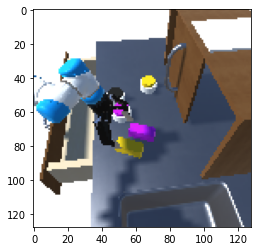

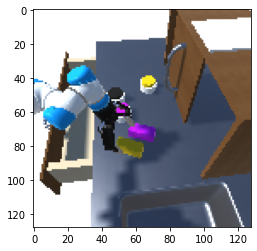

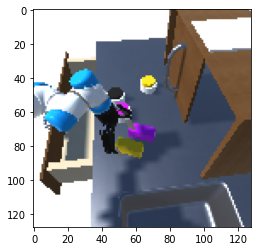

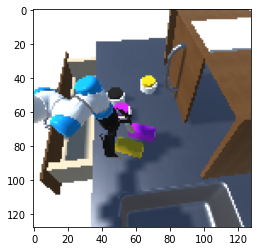

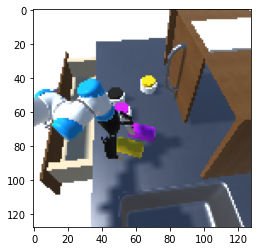

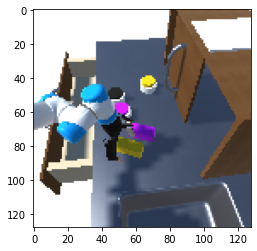

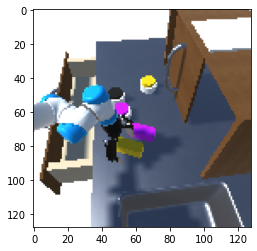

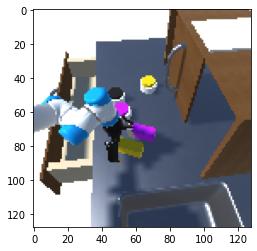

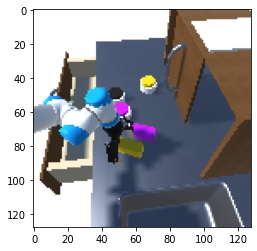

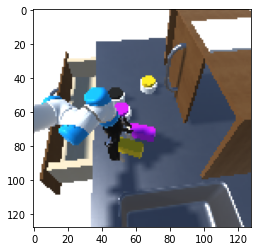

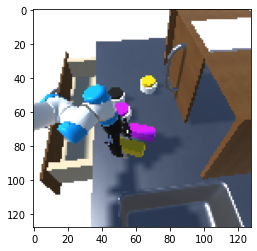

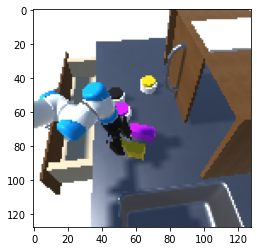

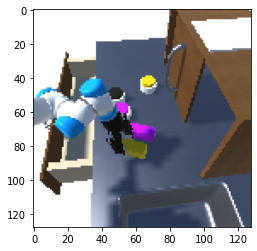

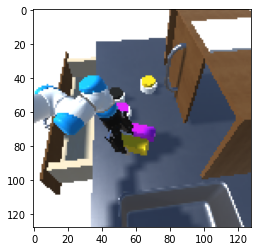

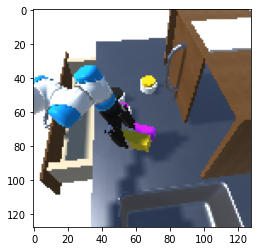

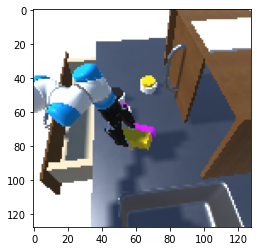

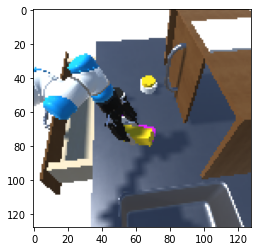

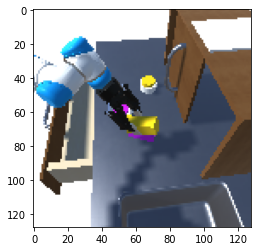

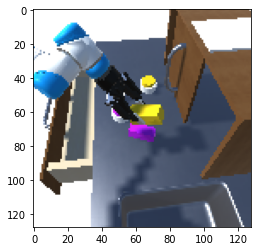

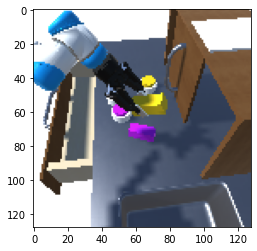

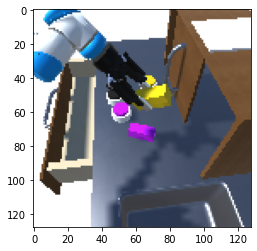

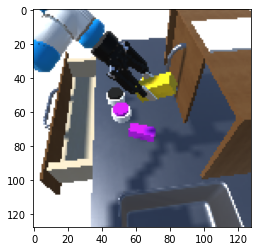

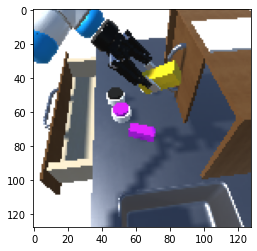

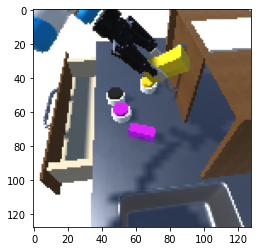

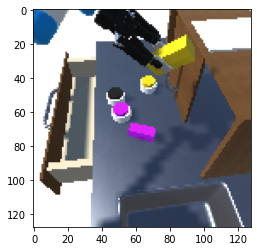

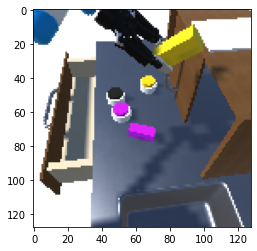

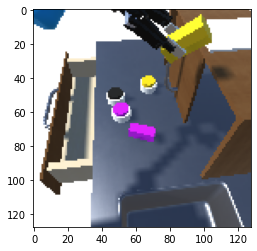

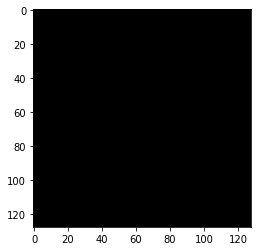

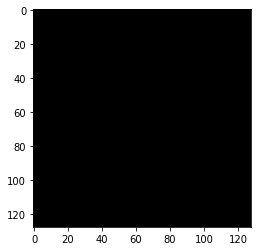

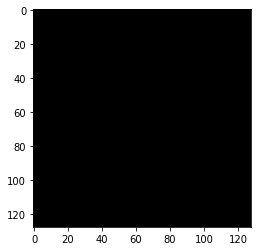

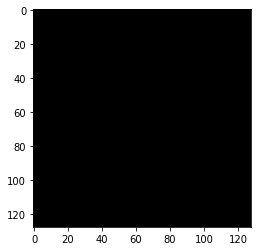

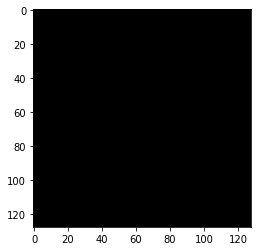

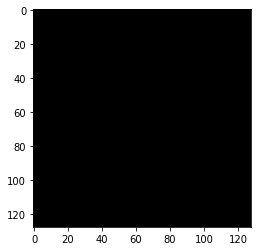

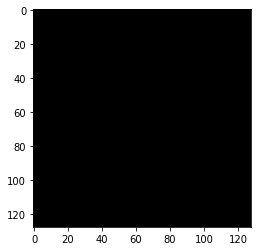

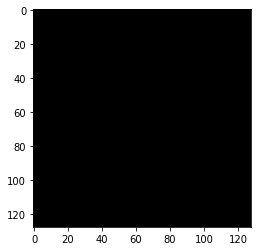

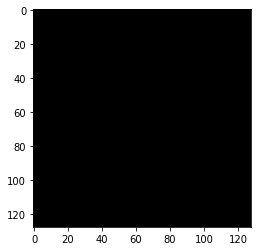

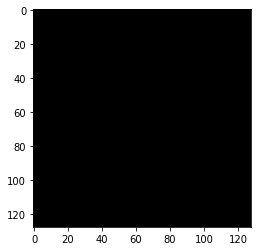

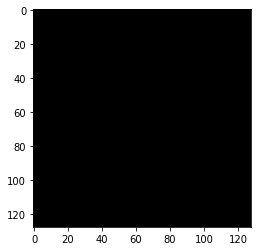

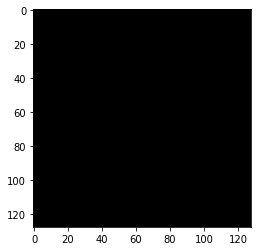

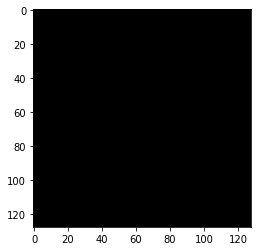

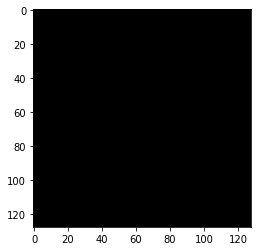

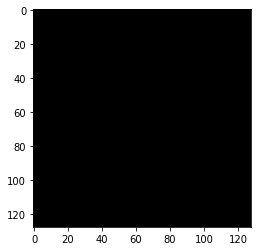

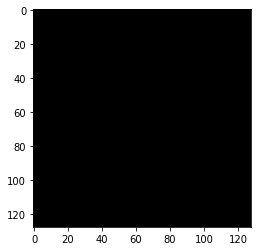

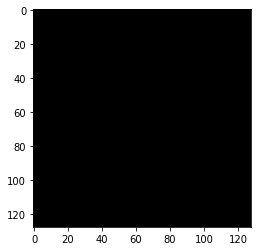

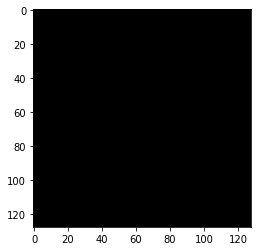

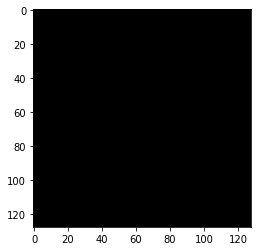

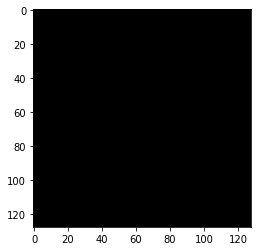

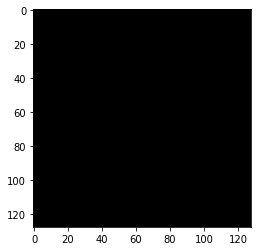

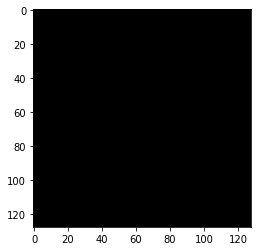

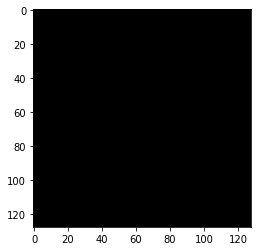

In [33]:
print(t['labels'])
for i in range(0, len(t['imgs'])):
    plt.imshow(t['imgs'][i,:,:,:])
    plt.show()

'lift the yellow block up'

NameError: name 'Path' is not defined

In [3]:

from pathlib import Path

In [4]:
Path.cwd()

PosixPath('/catkin_ws/src/robotics/learning_from_play/notebooks')